# Gradient Descent

## Univariate Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
# Create samples
X = np.random.uniform(1,50,500)
y = 5 + 2*X + np.random.normal(0,10,500)

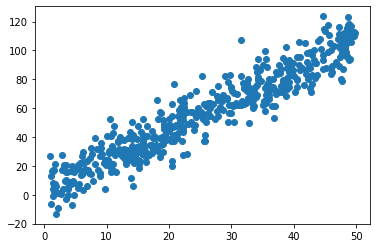

In [32]:
plt.scatter(X,y)

### Testing numpy functions for algorithm

In [33]:
Xpd = pd.DataFrame(X)[0:5]
ypd = pd.DataFrame(y)[0:5]
Xpd

,0
0,16.497237
1,5.992727
2,18.651462
3,14.249271
4,42.292883


In [34]:
zpd = pd.concat([Xpd,ypd],axis=1,keys=['X','y'])
zpd['loss'] = np.power((zpd['X'] - zpd ['y']),2)
zpd

,X,y,loss
,0,0,
0,16.497237,40.936716,597.288116
1,5.992727,14.641376,74.799130
2,18.651462,34.465267,250.076440
3,14.249271,26.593132,152.370892
4,42.292883,80.423847,1453.970419


In [35]:
np.sum(zpd['loss'])

2528.504997165929

In [36]:
+23.65+1673.01+493.81+1440.57+950

4581.04

In [37]:
np.sum(np.power(Xpd-ypd,2))

0    2528.504997
dtype: float64

In [38]:
X1 = X[0:5]
y1 = y[0:5]
np.sum(np.power(X1-y1,2))

2528.504997165929

### Algorithm

In [39]:
# Algorithm
def uni_gd(X, y, b0 = 1, b1 = 1, 
           alpha = 0.01, tolerance = 0.001,
           iterations = 1000,
           details = False):
    m = len(y)
    loss = np.sum(np.power(b0+b1*X-y,2))
    loss_aux = loss*2
    b0s, b1s, losses = [], [], []
    results = {}
    index = 1
    state = 'Iterations Completed'
    for i in range(iterations):
        if loss > loss_aux:
            state = 'Divergence'
            break
        elif loss_aux - loss > tolerance:
            if details:
              b0s.append(b0)
              b1s.append(b1)
              losses.append(loss)
            b0_aux = b0 - alpha*(1/m)*np.sum(b0+b1*X-y)
            b1_aux = b1 - alpha*(1/m)*np.sum((b0+b1*X-y)*X)
            b0 = b0_aux
            b1 = b1_aux
            loss_aux = loss
            loss = np.sum(np.power(b0+b1*X-y,2))
            index += 1
        else:
            state = 'Tolerance reached'
            break
    results['b0'], results['b1'] = b0, b1
    if details:
      details_dict = {'iteration': range(1,index), 
                      'b0': b0s, 'b1': b1s, 'losses': losses}
      details_df = pd.DataFrame(data = details_dict)
      results['details'] = details_df
    print(state)
    return results


In [40]:
# Let's try it out
results = uni_gd(X,y,alpha = 0.01,
                 iterations = 1000,
                 details = True)
results

Divergence


{'b0': 1.298870876748491,
 'b1': 10.809751668064274,
 'details':    iteration  b0  b1         losses
 0          1   1   1  610009.087193}

In [43]:
# Reduce the learning rate
results = uni_gd(X,y,alpha = 0.001,
                 iterations = 10000,
                 details = True)
results['details'].tail()

Iterations Completed


,iteration,b0,b1,losses
9995,9996,3.558768,2.066770,48457.505521
9996,9997,3.558830,2.066768,48457.501783
9997,9998,3.558891,2.066766,48457.498047
9998,9999,3.558952,2.066764,48457.494313
9999,10000,3.559013,2.066762,48457.490581


In [45]:
# Let's see if we can improve it with more iterations
# We don't need the details
results = uni_gd(X,y,alpha = 0.001, 
                 iterations = 1000000,details = False)
print('b0: ' + str(results['b0']))
print('b1: ' + str(results['b1']))

Tolerance reached
b0: 3.6825012941846866
b1: 2.0630837263771844


In [46]:
# Same iterations, lower tolerance
results = uni_gd(X,y,alpha = 0.001,
                 iterations = 1000000,
                 tolerance = 0.0000001,
                 details = False)
print('b0: ' + str(results['b0']))
print('b1: ' + str(results['b1']))

Tolerance reached
b0: 3.813626953948291
b1: 2.059177514181588


# Feature Standardization

In [54]:
X_std = (X - X.mean()) / X.std()

In [52]:
X_std.mean()

-1.1013412404281553e-16

In [57]:
b1_std = 2 * X.std()
b0_std = 5 + 2 * X.mean()
print('b0_std: ' + str(b0_std))
print('b1_std: ' + str(b1_std)) 

b0_std: 56.12107155858746
b1_std: 28.630490920608402


In [61]:
results = uni_gd(X_std,y,alpha = 0.001,
                 iterations = 1000000,
                 tolerance = 0.0000001,
                 details = False)
print('b0_std: ' + str(results['b0']))
print('b1_std: ' + str(results['b1']))
print('b0: ' + str(results['b0'] / (2 * X.std())))
print('b1: ' + str(results['b1'] / (2 * X.mean()) + 5))

Tolerance reached
b0_std: 56.447342595400606
b1_std: 29.476922474941052
b0: 1.971581372877175
b1: 5.576610027455292


# Quadratic Function

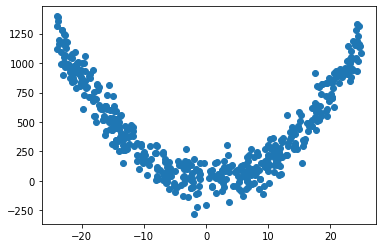

In [3]:
# Create samples
W = np.random.uniform(1,50,500) - 25
z = 5 + 2 * W**2 - 3 * W  + np.random.normal(0,100,500)
plt.scatter(W,z)

## Multivariate Linear Regression

In [17]:
# Create samples
np.random.seed(42)
X = np.random.uniform(1,50,(500,4))
X0 = np.ones(500).reshape(500,1)
X = np.concatenate((X0,X),axis=1)
X = np.mat(X)
betas = np.array([10,2,3,-1,5])
noise = np.random.normal(0,5,500).reshape(500,1)
y = X*(betas.reshape(5,1)) + noise

In [18]:
dfX = pd.DataFrame(X,columns=['inter','X1','X2','X3','X4'])
dfy = pd.DataFrame(y,columns=['y'])
df = pd.concat([dfX,dfy],axis=1)
df.head(5)

,inter,X1,X2,X3,X4,y
0,1.0,19.352466,47.585001,36.867703,30.334266,301.873647
1,1.0,8.644913,8.643731,3.846097,43.442631,262.453678
2,1.0,30.454636,35.695556,2.008640,48.525583,417.482819
3,1.0,41.789689,11.404616,9.909423,9.986821,169.654737
4,1.0,15.907870,26.713065,22.165306,15.270228,180.708692


In [19]:
# Algorithm
def multi_gd(X,y,betas=[1 for i in range(np.shape(X)[1])],\
                  alphas=[0.01 for i in range(np.shape(X)[1])],\
                          tolerance=0.001,iterations=1000,print_out=False):
    m,p = np.shape(X)[0],np.shape(X)[1]
    betas = np.array(betas)
    loss = np.sum(np.power(X*(betas.reshape(p,1))-y,2))
    loss_aux = loss*2
    for i in range(iterations):
        if loss > loss_aux:
            print('Divergence')
            break
        elif loss_aux - loss > tolerance:
            if print_out == True:
                print('betas: ',betas,', loss: ',loss)
            # Create aux var for each beta
            betas_aux = []
            for j in range(p):
                beta = betas[j] - alphas[j]*(1/m)*\
                np.sum(np.multiply((X*(betas.reshape(p,1))-y),X[:,j]))
                betas_aux.append(beta)
            # Assign aux var to betas list
            betas = np.array(betas_aux)
            loss_aux = loss
            loss = np.sum(np.power(X*(betas.reshape(p,1))-y,2))
            if print_out == True:
                print('betas: ',betas,', loss: ',loss)
        else:
            print('Tolerance reached')
            break
    return betas,loss

In [20]:
multi_gd(X,y,print_out=True)

betas:  [1 1 1 1 1] , loss:  12493537.97967219
betas:  [ 2.42456749 39.28148069 40.73588071 32.00263497 46.22960318] , loss:  7754880491.597801
Divergence


(array([ 2.42456749, 39.28148069, 40.73588071, 32.00263497, 46.22960318]),
 7754880491.597801)

In [21]:
alphas = [0.0001 for i in range(5)]
multi_gd(X,y,alphas=alphas,print_out=True)

betas:  [1 1 1 1 1] , loss:  12493537.97967219
betas:  [1.01424567 1.38281481 1.39735881 1.31002635 1.45229603] , loss:  7274988.141816134
betas:  [1.01424567 1.38281481 1.39735881 1.31002635 1.45229603] , loss:  7274988.141816134
betas:  [1.02455201 1.65755132 1.68820498 1.51718062 1.79115418] , loss:  4530459.364913756
betas:  [1.02455201 1.65755132 1.68820498 1.51718062 1.79115418] , loss:  4530459.364913756
betas:  [1.03201649 1.85435097 1.90212613 1.65045347 2.0479548 ] , loss:  3074312.398410462
betas:  [1.03201649 1.85435097 1.90212613 1.65045347 2.0479548 ] , loss:  3074312.398410462
betas:  [1.03743072 1.99495523 2.06046669 1.73075028 2.24533766] , loss:  2289601.013407496
betas:  [1.03743072 1.99495523 2.06046669 1.73075028 2.24533766] , loss:  2289601.013407496
betas:  [1.04136577 2.09504648 2.17862506 1.77314445 2.39963758] , loss:  1855278.9949683067
betas:  [1.04136577 2.09504648 2.17862506 1.77314445 2.39963758] , loss:  1855278.9949683067
betas:  [1.04423353 2.16593648 

(array([ 1.10653158,  2.07958199,  3.09187571, -0.91340888,  5.07499019]),
 13936.354086253745)

In [22]:
alphas = [0.1,0.0001,0.0001,0.0001,0.0001]
multi_gd(X,y,alphas=alphas)

(array([ 8.7922555 ,  2.01103342,  3.01538995, -0.97583026,  5.00170372]),
 11962.13499761004)

In [23]:
alphas = [0.5,0.0001,0.0001,0.0001,0.0001]
betas = [8.7922555,2.01103342,3.01538995,-0.97583026,5.00170372]
multi_gd(X,y,betas=betas,alphas=alphas)

Tolerance reached


(array([ 8.64550811,  2.01235357,  3.01688624, -0.97463766,  5.00312069]),
 11961.040547154136)

In [24]:
# Algorithm without tolerance
def multi_gd_no_tol(X,y,betas=[1 for i in range(np.shape(X)[1])],\
                  alphas=[0.01 for i in range(np.shape(X)[1])],\
                          iterations=1000,print_out=False):
    m,p = np.shape(X)[0],np.shape(X)[1]
    betas = np.array(betas)
    loss = np.sum(np.power(X*(betas.reshape(p,1))-y,2))
    loss_aux = loss*2
    for i in range(iterations):
        if loss > loss_aux:
            print('Divergence')
            break
        else:
            if print_out == True:
                print('betas: ',betas,', loss: ',loss)
            # Create aux var for each beta
            betas_aux = []
            for j in range(p):
                beta = betas[j] - alphas[j]*(1/m)*\
                np.sum(np.multiply((X*(betas.reshape(p,1))-y),X[:,j]))
                betas_aux.append(beta)
            # Assign aux var to betas list
            betas = np.array(betas_aux)
            loss_aux = loss
            loss = np.sum(np.power(X*(betas.reshape(p,1))-y,2))
            if print_out == True:
                print('betas: ',betas,', loss: ',loss)
    return betas,loss

In [25]:
betas = [8,1,1,1,1]
alphas = [0.1,0.0001,0.0001,0.0001,0.0001]
multi_gd_no_tol(X,y,betas=betas,alphas=alphas,iterations=1000000000)

(array([ 8.61297111,  2.01264864,  3.01725867, -0.97438687,  5.00344668]),
 11961.002084310096)

In [26]:
alphas = [0.0001,0.0001,0.0001,0.0001,0.0001]
betas = [10,2.01103342,3.01538995,-0.97583026,5.00170372]
multi_gd_no_tol(X,y,betas=betas,alphas=alphas)

(array([ 9.98991151,  2.00037075,  3.00357133, -0.98557234,  4.99032313]),
 12027.469861597076)

# Quadratic Function